In [197]:
import scipy
from scipy.signal import ricker
from scipy.signal import cwt
from scipy.signal import find_peaks_cwt
from scipy.signal import savgol_filter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')
sns.set_style("whitegrid")

In [226]:
df = pd.read_csv('C:\maldb\storage\sample_data\spectra\lactoferrin_MS.txt', delim_whitespace=True, names=['mz', 'int'])
data = df.to_numpy()

x_series = np.transpose(df.to_numpy())[0]
y_series = np.transpose(df.to_numpy())[1]

#Smooth
#y_series = savgol_filter(y_series, 5, 4)

#Normalize
y_series = y_series/y_series.max()

[643.839, 675.1489999999999, 676.09, 681.808, 707.209, 831.482, 871.19, 878.6260000000001, 879.633, 979.685, 980.7489999999999, 1006.824, 1073.93, 1097.837, 1098.888, 1099.7910000000002, 1228.025, 1229.059, 1266.0, 1314.1660000000002, 1315.1529999999998, 1316.223, 1318.118, 1321.086, 1322.076, 1323.066, 1330.175, 1363.0739999999998, 1364.08, 1382.164, 1402.069, 1459.001, 1460.0420000000001, 1460.996, 1482.0770000000002, 1483.126, 1574.231, 1592.31, 1709.1770000000001, 1726.2279999999998, 1727.267, 1729.346, 2211.652, 2212.83, 2283.873, 2284.853, 2314.5589999999997, 2314.998, 2315.875, 2558.881, 2559.4570000000003, 2560.149, 2561.303, 3163.647]


(650.0, 2000.0)

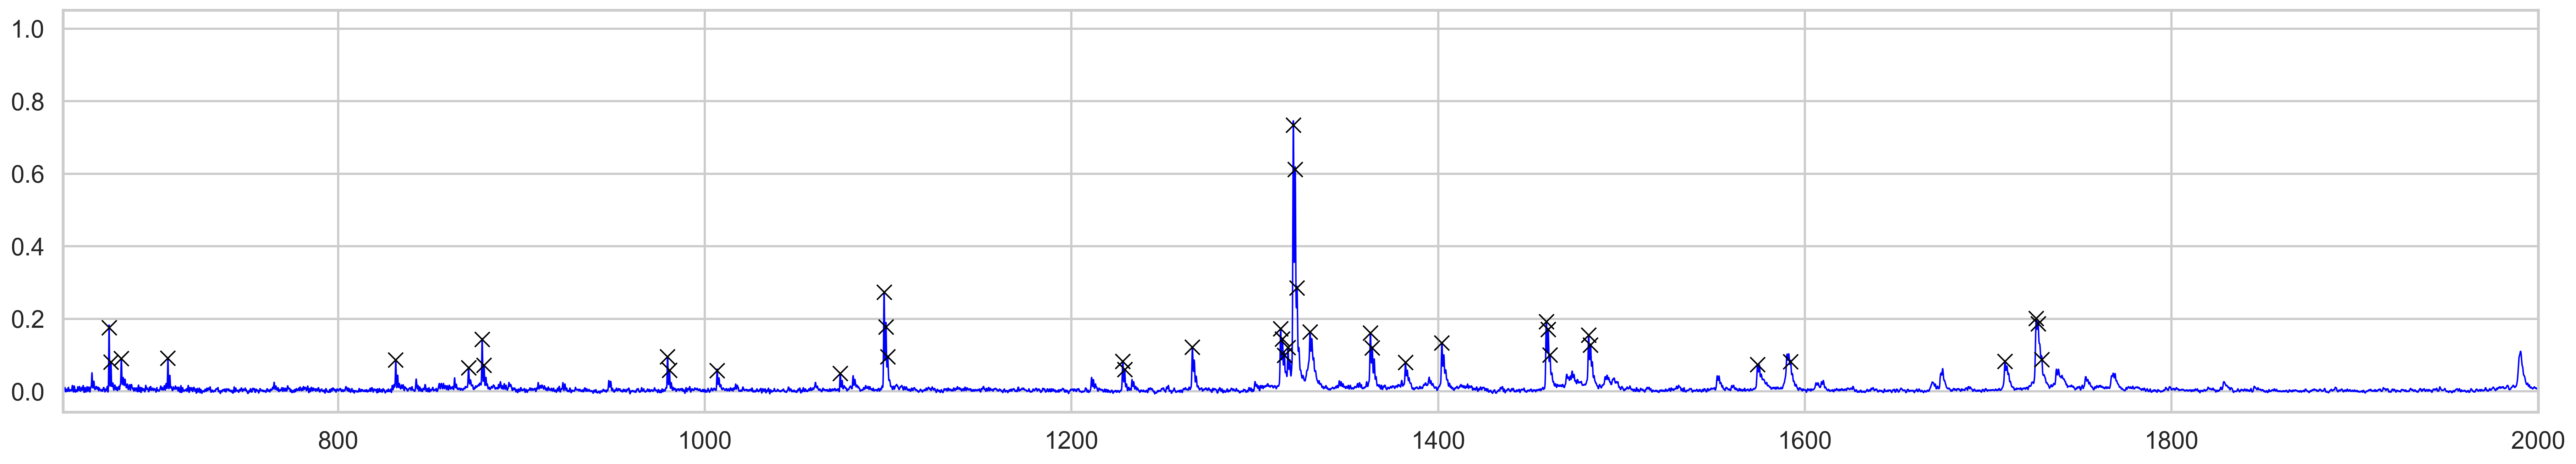

In [243]:
widths = np.linspace(1, 3, 20)
peaks = find_peaks_cwt(y_series, widths, max_distances=widths, min_snr=5)
masses = [x_series[i] for i in peaks]
print(masses)

#Bin
binned_masses = []
bin_width = 1.8


plt.figure(figsize=(30,5), dpi=300)
plt.plot(x_series, y_series, 'b', linewidth=1, marker='x', markeredgecolor='k', markersize=10, markevery=peaks)
plt.xlim(650, 2000)